In [101]:
import pandas as pd
import numpy as np
import csv
import sys

In [197]:
csv_path = "C:\\Users\\Вика\\Desktop\\py_notebook\\ukrdate\\data\\profiles.csv"

In [198]:
with open(csv_path, "r", encoding="UTF-8", newline="") as reader:
    profiles = reader.read().splitlines()


In [379]:
profiles_without_optimaze = pd.read_csv(csv_path,
                       header=0,
                       names=["id", "name", "age", "z", "city", "country", "from", "to", "interests", "urls", "last", "prflink"],
                       skip_blank_lines=True)


profiles_with_optimaze = pd.read_csv(csv_path,
                       header=0,
                       names=["id", "name", "age", "z", "city", "country", "from", "to", "interests", "urls", "last", "prflink"],
                       skip_blank_lines=True,
                       dtype={"from": np.float16, 
                              "to": np.float16, 
                              "age": np.int8})

<H1>Действия ниже можно сделать в read_csv</H1>

In [380]:
profiles_with_optimaze.head(3)

,id,name,age,z,city,country,from,to,interests,urls,last,prflink
0,6168433,OLGA,52,Рыбы,Геническ,Украина,48.0,62.0,"дружба, любовь, брак, встреча",https://ukrdate.net/photos/33/3433/6168433/oci...,NaN,https://ukrdate.net/u/uk5067609
1,11790031,Лия,60,Овен,Киев,Украина,58.0,66.0,"дружба, любовь, брак, встреча",https://ukrdate.net/photos/31/31/11790031/viyk...,была позавчера,https://ukrdate.net/u/du8430249
2,10193113,Светлана,53,Рак,Запорожье,Украина,40.0,61.0,дружба,https://ukrdate.net/photos/113/3113/10193113/y...,была час назад,https://ukrdate.net/u/ru9432768


In [381]:
ages = pd.Series(profiles_with_optimaze["age"])

In [382]:
ages.name = "Age"

In [383]:
ages[(ages[ages > 20]) & (ages[ages < 30])]

9       29
10      26
11      24
26      26
29      23
        ..
1126    28
1127    28
1131    29
1135    28
1155    21
Name: Age, Length: 200, dtype: int8

In [384]:
ages.mean()

41.44772344013491

In [385]:
df = pd.DataFrame(profiles_with_optimaze)
type(df)

pandas.core.frame.DataFrame

In [386]:
df.columns

Index(['id', 'name', 'age', 'z', 'city', 'country', 'from', 'to', 'interests',
       'urls', 'last', 'prflink'],
      dtype='object')

In [387]:
df.index

RangeIndex(start=0, stop=1186, step=1)

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1186 non-null   int64  
 1   name       1186 non-null   object 
 2   age        1186 non-null   int8   
 3   z          1186 non-null   object 
 4   city       1186 non-null   object 
 5   country    1186 non-null   object 
 6   from       1184 non-null   float16
 7   to         1184 non-null   float16
 8   interests  1186 non-null   object 
 9   urls       1186 non-null   object 
 10  last       1132 non-null   object 
 11  prflink    1186 non-null   object 
dtypes: float16(2), int64(1), int8(1), object(8)
memory usage: 89.3+ KB


In [389]:
df.describe()

,id,age,from,to
count,1.186000e+03,1186.000000,1184.000000,1184.000000
mean,1.058848e+07,41.447723,39.093750,52.125000
std,2.266001e+06,13.420347,12.460938,13.726562
min,6.043950e+05,18.000000,18.000000,23.000000
25%,1.109280e+07,31.000000,30.000000,43.000000
50%,1.165420e+07,41.000000,38.000000,51.000000
75%,1.172971e+07,52.000000,48.000000,61.000000
max,1.179003e+07,72.000000,70.000000,90.000000


In [390]:
df.dtypes.value_counts()

object     8
float16    2
int64      1
int8       1
dtype: int64

In [391]:
df.size

14232

In [392]:
df.shape

(1186, 12)

<h1>LOC VS ILOC</h1>

In [393]:
df.loc[[2, 3]]

,id,name,age,z,city,country,from,to,interests,urls,last,prflink
2,10193113,Светлана,53,Рак,Запорожье,Украина,40.0,61.0,дружба,https://ukrdate.net/photos/113/3113/10193113/y...,была час назад,https://ukrdate.net/u/ru9432768
3,9580194,Таня,40,Лев,Винница,Украина,40.0,50.0,"дружба, любовь, брак",https://ukrdate.net/photos/194/194/9580194/clu...,была 5 часов назад,https://ukrdate.net/u/du5828766


In [394]:
df.loc[3]  # по индеску(может быть юбым)

id                                                     9580194
name                                                      Таня
age                                                         40
z                                                          Лев
city                                                   Винница
country                                                Украина
from                                                      40.0
to                                                        50.0
interests                                 дружба, любовь, брак
urls         https://ukrdate.net/photos/194/194/9580194/clu...
last                                        была 5 часов назад
prflink                        https://ukrdate.net/u/du5828766
Name: 3, dtype: object

In [395]:
df.iloc[3]  # по позиции

id                                                     9580194
name                                                      Таня
age                                                         40
z                                                          Лев
city                                                   Винница
country                                                Украина
from                                                      40.0
to                                                        50.0
interests                                 дружба, любовь, брак
urls         https://ukrdate.net/photos/194/194/9580194/clu...
last                                        была 5 часов назад
prflink                        https://ukrdate.net/u/du5828766
Name: 3, dtype: object

In [396]:
df.iloc[-1]  # поселдняя строчка

id                                                    11601960
name                                                     Елена
age                                                         59
z                                                          Лев
city                                                  Николаев
country                                                Украина
from                                                      57.0
to                                                        65.0
interests                        дружба, любовь, брак, встреча
urls         https://ukrdate.net/photos/160/1960/11601960/p...
last                                         была 6 дней назад
prflink                        https://ukrdate.net/u/ru7201876
Name: 1185, dtype: object

In [397]:
df.loc[2:4, ["age", "last"]]  # 2:4 - включительно

,age,last
2,53,была час назад
3,40,была 5 часов назад
4,65,была 4 дня назад


In [398]:
# в iloc не имя колонки а позиция
df.iloc[2:4, [1, 5, 4, 8, 2]]  # 2:4 - исключительно

,name,country,city,interests,age
2,Светлана,Украина,Запорожье,дружба,53
3,Таня,Украина,Винница,"дружба, любовь, брак",40


In [399]:
df["added_column"] = pd.Series([1, 2, 3], name="added_column")

In [400]:
df.head(5)

,id,name,age,z,city,country,from,to,interests,urls,last,prflink,added_column
0,6168433,OLGA,52,Рыбы,Геническ,Украина,48.0,62.0,"дружба, любовь, брак, встреча",https://ukrdate.net/photos/33/3433/6168433/oci...,NaN,https://ukrdate.net/u/uk5067609,1.0
1,11790031,Лия,60,Овен,Киев,Украина,58.0,66.0,"дружба, любовь, брак, встреча",https://ukrdate.net/photos/31/31/11790031/viyk...,была позавчера,https://ukrdate.net/u/du8430249,2.0
2,10193113,Светлана,53,Рак,Запорожье,Украина,40.0,61.0,дружба,https://ukrdate.net/photos/113/3113/10193113/y...,была час назад,https://ukrdate.net/u/ru9432768,3.0
3,9580194,Таня,40,Лев,Винница,Украина,40.0,50.0,"дружба, любовь, брак",https://ukrdate.net/photos/194/194/9580194/clu...,была 5 часов назад,https://ukrdate.net/u/du5828766,NaN
4,7178184,Светлана,65,Телец,Киев,Украина,61.0,69.0,"дружба, любовь, брак, встреча",https://ukrdate.net/photos/184/3184/7178184/z6...,была 4 дня назад,https://ukrdate.net/u/ru2095789,NaN


In [401]:
df["added_column"] = "h" # добавляет в каждую строку

In [402]:
df.head(2)

,id,name,age,z,city,country,from,to,interests,urls,last,prflink,added_column
0,6168433,OLGA,52,Рыбы,Геническ,Украина,48.0,62.0,"дружба, любовь, брак, встреча",https://ukrdate.net/photos/33/3433/6168433/oci...,NaN,https://ukrdate.net/u/uk5067609,h
1,11790031,Лия,60,Овен,Киев,Украина,58.0,66.0,"дружба, любовь, брак, встреча",https://ukrdate.net/photos/31/31/11790031/viyk...,была позавчера,https://ukrdate.net/u/du8430249,h


In [403]:
df["multiplaied"] = df["age"] * df["to"]

In [404]:
df.head(5)

,id,name,age,z,city,country,from,to,interests,urls,last,prflink,added_column,multiplaied
0,6168433,OLGA,52,Рыбы,Геническ,Украина,48.0,62.0,"дружба, любовь, брак, встреча",https://ukrdate.net/photos/33/3433/6168433/oci...,NaN,https://ukrdate.net/u/uk5067609,h,3224.0
1,11790031,Лия,60,Овен,Киев,Украина,58.0,66.0,"дружба, любовь, брак, встреча",https://ukrdate.net/photos/31/31/11790031/viyk...,была позавчера,https://ukrdate.net/u/du8430249,h,3960.0
2,10193113,Светлана,53,Рак,Запорожье,Украина,40.0,61.0,дружба,https://ukrdate.net/photos/113/3113/10193113/y...,была час назад,https://ukrdate.net/u/ru9432768,h,3232.0
3,9580194,Таня,40,Лев,Винница,Украина,40.0,50.0,"дружба, любовь, брак",https://ukrdate.net/photos/194/194/9580194/clu...,была 5 часов назад,https://ukrdate.net/u/du5828766,h,2000.0
4,7178184,Светлана,65,Телец,Киев,Украина,61.0,69.0,"дружба, любовь, брак, встреча",https://ukrdate.net/photos/184/3184/7178184/z6...,была 4 дня назад,https://ukrdate.net/u/ru2095789,h,4484.0


In [405]:
# df = df.drop(columns=["added_column", "multiplaied"])  # delete unnesessary columns
df.head(2)

,id,name,age,z,city,country,from,to,interests,urls,last,prflink,added_column,multiplaied
0,6168433,OLGA,52,Рыбы,Геническ,Украина,48.0,62.0,"дружба, любовь, брак, встреча",https://ukrdate.net/photos/33/3433/6168433/oci...,NaN,https://ukrdate.net/u/uk5067609,h,3224.0
1,11790031,Лия,60,Овен,Киев,Украина,58.0,66.0,"дружба, любовь, брак, встреча",https://ukrdate.net/photos/31/31/11790031/viyk...,была позавчера,https://ukrdate.net/u/du8430249,h,3960.0


In [406]:
df = df.rename(columns={"z": "zodiac"})
df.head(1)

,id,name,age,zodiac,city,country,from,to,interests,urls,last,prflink,added_column,multiplaied
0,6168433,OLGA,52,Рыбы,Геническ,Украина,48.0,62.0,"дружба, любовь, брак, встреча",https://ukrdate.net/photos/33/3433/6168433/oci...,NaN,https://ukrdate.net/u/uk5067609,h,3224.0


In [409]:
df.columns

Index(['id', 'name', 'age', 'zodiac', 'city', 'country', 'from', 'to',
       'interests', 'urls', 'last', 'prflink', 'added_column', 'multiplaied'],
      dtype='object')

In [410]:
df["Data"] = "01.01.2022"

In [411]:
df["Data"] = pd.to_datetime(df["Data"])

In [413]:
df.head(1)

,id,name,age,zodiac,city,country,from,to,interests,urls,last,prflink,added_column,multiplaied,Data
0,6168433,OLGA,52,Рыбы,Геническ,Украина,48.0,62.0,"дружба, любовь, брак, встреча",https://ukrdate.net/photos/33/3433/6168433/oci...,NaN,https://ukrdate.net/u/uk5067609,h,3224.0,2022-01-01


In [420]:
df.dtypes

id                       int64
name                    object
age                       int8
zodiac                  object
city                    object
country                 object
from                   float16
to                     float16
interests               object
urls                    object
last                    object
prflink                 object
added_column            object
multiplaied            float16
Data            datetime64[ns]
dtype: object

In [426]:
df.set_index("name", inplace=False)  # поменять существующий датарейм - тру иначе копия
df.sort_index(inplace=False)
df.head(5)

,id,name,age,zodiac,city,country,from,to,interests,urls,last,prflink,added_column,multiplaied,Data
0,6168433,OLGA,52,Рыбы,Геническ,Украина,48.0,62.0,"дружба, любовь, брак, встреча",https://ukrdate.net/photos/33/3433/6168433/oci...,NaN,https://ukrdate.net/u/uk5067609,h,3224.0,2022-01-01
1,11790031,Лия,60,Овен,Киев,Украина,58.0,66.0,"дружба, любовь, брак, встреча",https://ukrdate.net/photos/31/31/11790031/viyk...,была позавчера,https://ukrdate.net/u/du8430249,h,3960.0,2022-01-01
2,10193113,Светлана,53,Рак,Запорожье,Украина,40.0,61.0,дружба,https://ukrdate.net/photos/113/3113/10193113/y...,была час назад,https://ukrdate.net/u/ru9432768,h,3232.0,2022-01-01
3,9580194,Таня,40,Лев,Винница,Украина,40.0,50.0,"дружба, любовь, брак",https://ukrdate.net/photos/194/194/9580194/clu...,была 5 часов назад,https://ukrdate.net/u/du5828766,h,2000.0,2022-01-01
4,7178184,Светлана,65,Телец,Киев,Украина,61.0,69.0,"дружба, любовь, брак, встреча",https://ukrdate.net/photos/184/3184/7178184/z6...,была 4 дня назад,https://ukrdate.net/u/ru2095789,h,4484.0,2022-01-01


 <h1 style="color:red;">Correlational analysis</h1> - определение связаны ли выранные значения в колонках или нет

In [435]:
df.corr(numeric_only=True)  # находит корреляции под копотом

,id,age,from,to,multiplaied
id,1.000000,-0.249360,-0.178719,-0.141446,-0.216547
age,-0.249360,1.000000,0.939460,0.696902,0.949264
from,-0.178719,0.939460,1.000000,0.737597,0.929561
to,-0.141446,0.696902,0.737597,1.000000,0.857632
multiplaied,-0.216547,0.949264,0.929561,0.857632,1.000000


<AxesSubplot: >

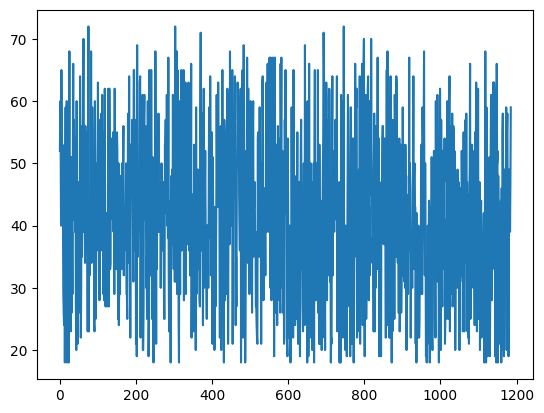

In [436]:
df["age"].plot()

In [506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1186 non-null   int64         
 1   name          1186 non-null   object        
 2   age           1186 non-null   int8          
 3   zodiac        1186 non-null   object        
 4   city          1186 non-null   object        
 5   country       1186 non-null   object        
 6   from          1184 non-null   float16       
 7   to            1184 non-null   float16       
 8   interests     1186 non-null   object        
 9   urls          1186 non-null   object        
 10  last          1132 non-null   object        
 11  prflink       1186 non-null   object        
 12  added_column  1186 non-null   object        
 13  multiplaied   1184 non-null   float16       
 14  Data          1186 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float16(3), int6

<AxesSubplot: xlabel='age'>

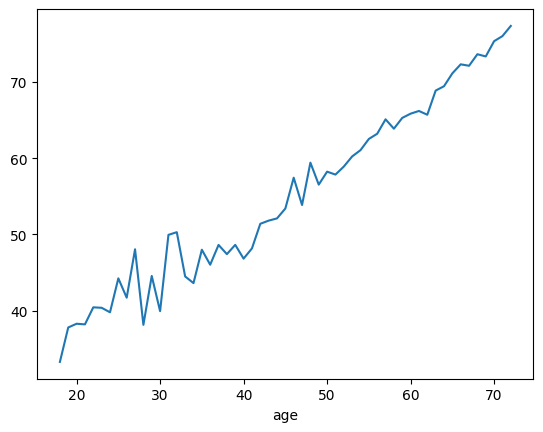

In [445]:
df.groupby("age")["to"].mean().plot()

<AxesSubplot: xlabel='from'>

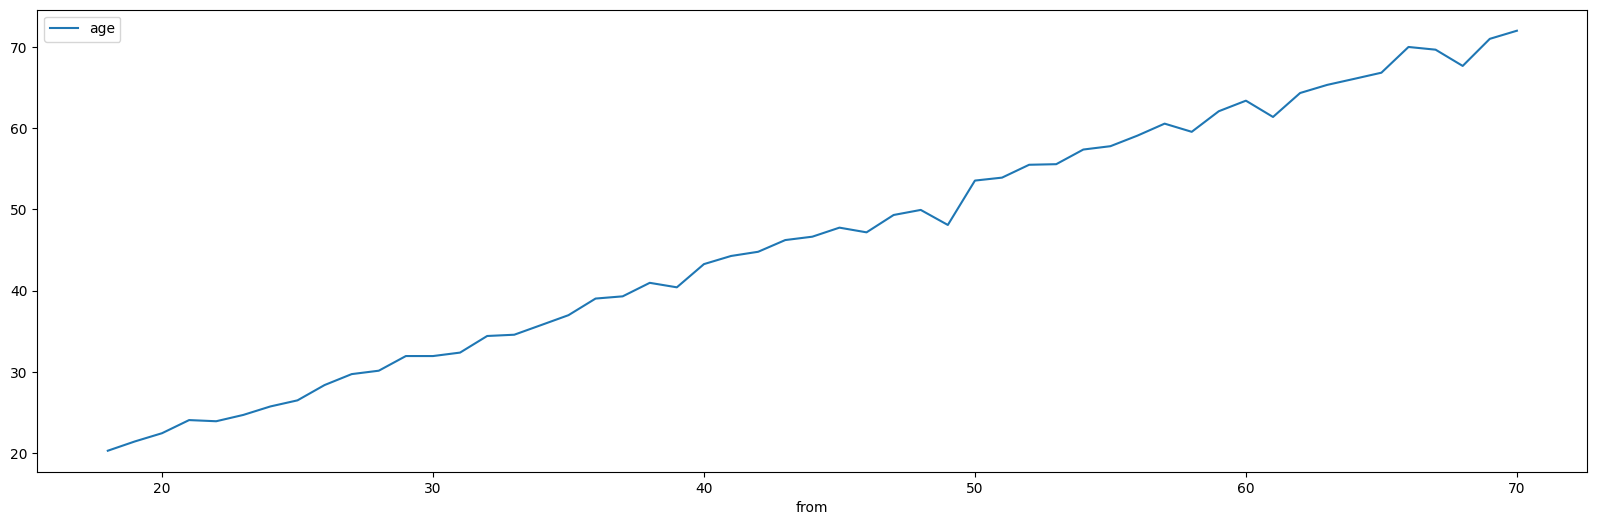

In [458]:
df.groupby("from")[["age"]].mean().plot(figsize=(20, 6))

<h1 style="color:blue;">Missing data</h1>

In [477]:
pd.isnull(df["last"]).sum()

54

In [480]:
df.fillna(0).head(5)  #  5 exe

,id,name,age,zodiac,city,country,from,to,interests,urls,last,prflink,added_column,multiplaied,Data
0,6168433,OLGA,52,Рыбы,Геническ,Украина,48.0,62.0,"дружба, любовь, брак, встреча",https://ukrdate.net/photos/33/3433/6168433/oci...,0,https://ukrdate.net/u/uk5067609,h,3224.0,2022-01-01
1,11790031,Лия,60,Овен,Киев,Украина,58.0,66.0,"дружба, любовь, брак, встреча",https://ukrdate.net/photos/31/31/11790031/viyk...,была позавчера,https://ukrdate.net/u/du8430249,h,3960.0,2022-01-01
2,10193113,Светлана,53,Рак,Запорожье,Украина,40.0,61.0,дружба,https://ukrdate.net/photos/113/3113/10193113/y...,была час назад,https://ukrdate.net/u/ru9432768,h,3232.0,2022-01-01
3,9580194,Таня,40,Лев,Винница,Украина,40.0,50.0,"дружба, любовь, брак",https://ukrdate.net/photos/194/194/9580194/clu...,была 5 часов назад,https://ukrdate.net/u/du5828766,h,2000.0,2022-01-01
4,7178184,Светлана,65,Телец,Киев,Украина,61.0,69.0,"дружба, любовь, брак, встреча",https://ukrdate.net/photos/184/3184/7178184/z6...,была 4 дня назад,https://ukrdate.net/u/ru2095789,h,4484.0,2022-01-01


<h1>Fixing logically incorrect data
</h1>

In [489]:
df["age"].unique()

array([52, 60, 53, 40, 65, 48, 42, 41, 29, 26, 24, 18, 44, 59, 32, 57, 37,
       31, 68, 47, 23, 51, 39, 66, 50, 54, 27, 20, 25, 35, 21, 45, 64, 56,
       22, 30, 61, 70, 34, 55, 36, 38, 46, 72, 43, 63, 28, 58, 62, 33, 49,
       19, 69, 67, 71], dtype=int8)

In [505]:
df[df["age"] > 100]

,id,name,age,zodiac,city,country,from,to,interests,urls,last,prflink,added_column,multiplaied,Data
